# Streeteasy 

En el siguiente proyecto se estudiará la relación entre los costos de renta de viviendas en tres ciudades de EUA, Brooklyn, Manhattan y Queens. 

Para predecir la renta de una vivienda, hay diversos factores a considerar, como son: ubicación, calidad del aire, datos demográficos, si cuenta con estacionamiento, etc.

Se utilizará regresión lineal múltiple para hacer la predicción. 

Los datos utilizados en este proyecto se obtuvieron de [Streeteasy](https://github.com/Codecademy/datasets/tree/master/streeteasy) en asociación con Codecademy. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('streeteasy.csv')

In [3]:
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


Los DF anteriores están divididos en las siguientes columnas: 

* rental_id: ID de la renta
* rent: precio de la renta (USD)
* bedrooms: número de cuartos
* bathrooms: número de baños
* size_sqft: tamaño (ft^2)
* min_to_subway: distancia a la estación de metro (min)
* floor: número de piso
* building_age_yrs: Edad del edificio
* no_fee: ¿tiene tarifa de intermediario? (0 sí, 1 no)
* has_roofdeck: ¿tiene cubierta de techo? (0 no, 1 sí)
* has_washer_dryer: ¿tiene lavasecadora? (0/1)
* has_doorman: ¿tiene portero? (0/1)
* has_elevator: ¿tiene elevador? (0/1)
* has_dishwasher: ¿tiene lavaplatos? (0/1)
* has_patio: ¿tiene patio? (0/1)
* has_gym: ¿el edificio tiene gimnasio? (0/1)
* neighborhood: vecindario
* borough: ciudad

Se considerarán como variables independientes todas las anteriores, excepto: `rental_id`, `rent`, `neighborhood` y `borough`. Como variable dependiente se tendrá la variable `rent`. 

In [4]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df.rent

Posteriormente, se dividen los datos de entrenamiento considerando el 80% del total de los datos y los de prueba el 20%. 

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 14)
(1000, 14)
(4000,)
(1000,)


Se construye el modelo y se ajusta a los datos de entrenamiento.

In [6]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Con el ajuste anterior, se obtiene un $R^2$ de 0.73.

In [7]:
print(mlr.score(x_train, y_train))

0.7255510771886733


En la siguiente tabla, observamos el coeficiente correspondiente a cada variable. Se observa que la variable de mayor impacto positivo en el modelo es `bathrooms`, mientras que la de mayor impacto negativo es `bedrooms`. 

In [8]:
print('intercept:', mlr.intercept_)
print(pd.DataFrame({'variable': x.columns, 'coef': mlr.coef_}))

intercept: -1038.1071730701087
            variable         coef
0           bedrooms  -464.263438
1          bathrooms  1380.381490
2          size_sqft     4.635737
3      min_to_subway   -16.734828
4              floor    39.515854
5   building_age_yrs    -4.517654
6             no_fee   -97.463002
7       has_roofdeck    28.805705
8   has_washer_dryer   101.934836
9        has_doorman   -79.824101
10      has_elevator   368.336988
11    has_dishwasher    76.187552
12         has_patio   -25.910430
13           has_gym  -109.060301


In [9]:
y_predicted = mlr.predict(x_test)
print(y_predicted[:10])

[2968.17177292 3149.12753641 3658.24906337 3096.32999864 3778.2025677
 4362.91452216 4775.79823726 4106.45799488 4516.284973   2601.05802792]


Ahora, se realiza una gráfica de dispersión de los valores de renta predichos y los reales. Como se esperaba, se observa comportamieto lineal entre ambas variables. 

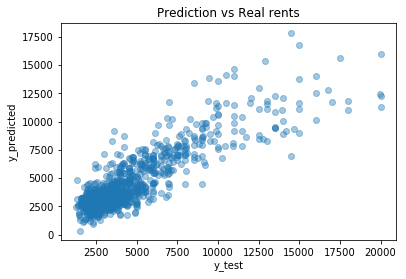

In [10]:
plt.scatter(y_test, y_predicted, alpha=0.4)
plt.title('Prediction vs Real rents')
plt.xlabel('y_test')
plt.ylabel('y_predicted')
plt.show()